In [4]:
#  UCI Machine Learning Data Load Library
!pip install ucimlrepo
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/111.9 kB ? eta -:--:--
     ------------------------------------ --- 102.4/111.9 kB ? eta -:--:--
     -------------------------------------- 111.9/111.9 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------------- ------------------------ 3.1/8.1 MB 101.1 MB/s eta 0:00:01
   ------------------------------ --------- 6.3/8.1 MB 101.2 MB/s eta 0:00:01
   ---------------------------------------  8.0/8.1 MB 73.1 MB/s eta 0:00:01
   ---------------------------------------  8.1/8.1 MB 64.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 47.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/225.2 kB ? eta -:--:--
   ---------------------------------------- 225.2/225.2 kB 4.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------  2.3/2.3 MB 70.4 MB/s eta 0:00:01
   ----------------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
from ucimlrepo import fetch_ucirepo


ModuleNotFoundError: No module named 'sklearn'

In [6]:
## 1. 데이터 로드
wine_quality = fetch_ucirepo(id=186)
X = wine_quality.data.features
y = wine_quality.data.targets['quality']

# Concatenate
df = pd.concat([X, y], axis=1)

print(f"Data Shape: {df.shape}")
print(f"Categorical Variable: {X.select_dtypes(include=['object']).columns.tolist()}")

print(f"Info: {df.info()}")
print(f"Samples: {df.head(5)}")

Data Shape: (6497, 12)
Categorical Variable: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB
Info: None
Samples:    fixed_acidity  volatile_acidity  citric_acid  residual_

In [9]:
## 3. 전처리

# 범주형 변수 전처리 (더미 코딩)
X = pd.get_dummies(X, drop_first=True)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
## 4. 모델링

# 하이퍼파라미터(실험용)
params = {
    'n_estimators': 100,
    'max_depth': 3,
    'learning_rate': 0.1,
    'min_child_weight' : 10,
    'subsample': 1,
    'colsample_bytree': 1,
    'random_state': 42
}

# Task1. Train 기준 Perfect Fitting 을 만들어보세요.
#params_overfitting = {
#    'n_estimators': ,
#    'max_depth': ,
#    'learning_rate': ,
#    'min_child_weight' : ,
#    'subsample': ,
#    'colsample_bytree': ,
#    'random_state': 42
#}

# Task2. Bias와 Variance를 고려한 Best Fitting 을 만들어보세요.
#params_best = {
#    'n_estimators': ,
#    'max_depth': ,
#    'learning_rate': ,
#    'min_child_weight' : ,
#    'subsample': ,
#    'colsample_bytree': ,
#    'random_state': 42
#}

# 모델 학습
model = XGBRegressor(**params)
#model = XGBRegressor(**params_overfitting)
#model = XGBRegressor(**params_best)

model.fit(X_train, y_train)

# 예측
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 성능 평가
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"\n=== 모델링 완료 ===")


=== 모델링 완료 ===



=== 모델 성능 ===
Train MAE: 0.4944, Train R²: 0.4701
Test MAE: 0.5308, Test R²: 0.3741
Test-Train MAE 차이: 0.0364


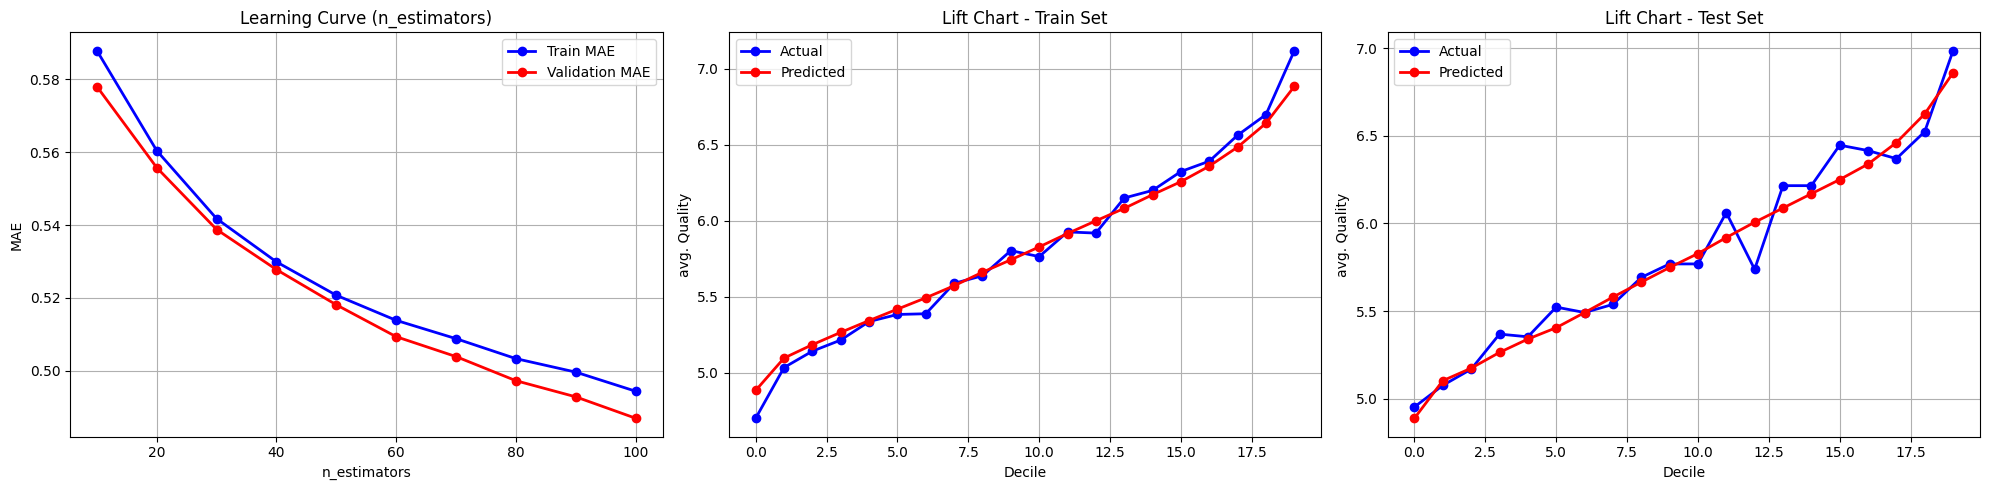

In [29]:
## 5. 성과분석

print(f"\n=== 모델 성능 ===")
print(f"Train MAE: {train_mae:.4f}, Train R²: {train_r2:.4f}")
print(f"Test MAE: {test_mae:.4f}, Test R²: {test_r2:.4f}")
print(f"Test-Train MAE 차이: {test_mae - train_mae:.4f}")

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# 1. Running curve (by n_estimators)
max_estimators = params['n_estimators']
step_size = max(10, max_estimators // 10)  # 최소 10 간격, 최대 10개 포인트
estimator_range = range(step_size, max_estimators + 1, step_size)
train_mae_scores = []
val_mae_scores = []

for n_est in estimator_range:
    temp_params = params.copy()
    temp_params['n_estimators'] = n_est

    temp_model = XGBRegressor(**temp_params)
    temp_model.fit(X_train, y_train)

    # Train MAE
    train_pred = temp_model.predict(X_train)
    train_mae_scores.append(mean_absolute_error(y_train, train_pred))

    # Validation MAE (단순 split 사용)
    X_val_split = X_train[:len(X_train)//5]  # 20% for validation
    y_val_split = y_train[:len(y_train)//5]
    val_pred = temp_model.predict(X_val_split)
    val_mae_scores.append(mean_absolute_error(y_val_split, val_pred))

axes[0].plot(estimator_range, train_mae_scores, 'o-', label='Train MAE', color='blue', linewidth=2)
axes[0].plot(estimator_range, val_mae_scores, 'o-', label='Validation MAE', color='red', linewidth=2)
axes[0].set_xlabel('n_estimators')
axes[0].set_ylabel('MAE')
axes[0].set_title('Learning Curve (n_estimators)')
axes[0].legend()
axes[0].grid(True)


# 2. Lift Chart - Train Set, 예측값기준 버킷분할
df_lift_train = pd.DataFrame({'actual': y_train, 'predicted': y_train_pred})
df_lift_train['decile'] = pd.qcut(df_lift_train['predicted'], q=20, labels=False, duplicates='drop')
lift_chart_train = df_lift_train.groupby('decile').agg({
    'actual': 'mean',
    'predicted': 'mean'
}).reset_index()

axes[1].plot(lift_chart_train['decile'], lift_chart_train['actual'], 'o-', label='Actual', color='blue', linewidth=2)
axes[1].plot(lift_chart_train['decile'], lift_chart_train['predicted'], 'o-', label='Predicted', color='red', linewidth=2)
axes[1].set_xlabel('Decile')
axes[1].set_ylabel('avg. Quality')
axes[1].set_title('Lift Chart - Train Set')
axes[1].legend()
axes[1].grid(True)


# 3. Lift Chart - Test Set
df_lift_test = pd.DataFrame({'actual': y_test, 'predicted': y_test_pred})
df_lift_test['decile'] = pd.qcut(df_lift_test['predicted'], q=20, labels=False, duplicates='drop')
lift_chart_test = df_lift_test.groupby('decile').agg({
    'actual': 'mean',
    'predicted': 'mean'
}).reset_index()

axes[2].plot(lift_chart_test['decile'], lift_chart_test['actual'], 'o-', label='Actual', color='blue', linewidth=2)
axes[2].plot(lift_chart_test['decile'], lift_chart_test['predicted'], 'o-', label='Predicted', color='red', linewidth=2)
axes[2].set_xlabel('Decile')
axes[2].set_ylabel('avg. Quality')
axes[2].set_title('Lift Chart - Test Set')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()

In [23]:
# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n=== Top 5 중요 변수 ===")
print(feature_importance.head())


=== Top 5 중요 변수 ===
                feature  importance
10              alcohol    0.253393
7               density    0.125056
1      volatile_acidity    0.096232
5   free_sulfur_dioxide    0.086647
9             sulphates    0.076436
